it means that stocks which have a very small market capitalization (very small companies) and are not frequently traded (illiquid) can have unreliable or inconsistent data. This is because:

Erratic price movements: Low trading volume makes these stocks susceptible to large price swings based on relatively small trades. A single large buy or sell order can significantly impact the price, making the price data look jumpy and unpredictable.
Inaccurate price quotes: The bid-ask spread (the difference between the highest price someone is willing to buy at and the lowest price someone is willing to sell at) tends to be wider for illiquid stocks. The last traded price may not be representative of the true value of the stock.
Limited analyst coverage: Small, illiquid stocks often have limited or no analyst coverage, which means less scrutiny and less readily available information about the company's financials and prospects. This lack of information can make it difficult to accurately assess the stock's value.
Data errors: Because these stocks are less closely monitored, errors in data reporting are more likely to occur and less likely to be quickly corrected.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

# using yfinance api
and retrieving data from it

(array([19844., 19905., 19967., 20028., 20089., 20148.]),
 [Text(19844.0, 0, '2024-05'),
  Text(19905.0, 0, '2024-07'),
  Text(19967.0, 0, '2024-09'),
  Text(20028.0, 0, '2024-11'),
  Text(20089.0, 0, '2025-01'),
  Text(20148.0, 0, '2025-03')])

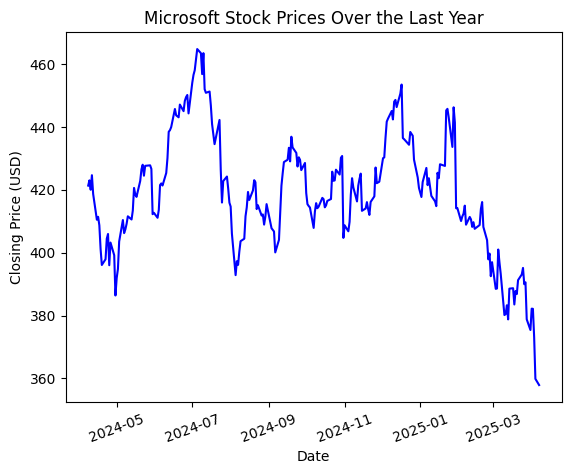

In [76]:
microsoft = yf.Ticker("MSFT")
microsoft_data = microsoft.history(period="1y")
microsoft_data.reset_index(inplace=True)
microsoft_data['Date'] = microsoft_data['Date'].dt.date

plt.plot(microsoft_data['Date'], microsoft_data['Close'], color='blue')
plt.title('Microsoft Stock Prices Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=20)

# Quant_task

In [77]:
capital = 10000             # in dollars
weights = np.zeros(10)
shares = np.zeros(10)
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=365+366)


# selecting stocks

In [78]:
# i will try to diversify the portfolio with multiple sectors to avoid any sector specific risk ,
# for that i have taken 2~3 stocks from each sector

In [79]:
companies = ['NFLX', 'MA', 'TSLA', 'PG', 'NVDA', 'IBM', 'AMT', 'AAPL', 'JNJ', 'META']
companies

['NFLX', 'MA', 'TSLA', 'PG', 'NVDA', 'IBM', 'AMT', 'AAPL', 'JNJ', 'META']

In [80]:
current_pf = pd.DataFrame({'Ticker': companies}, index=range(1,11))
current_pf

,Ticker
1,NFLX
2,MA
3,TSLA
4,PG
5,NVDA
6,IBM
7,AMT
8,AAPL
9,JNJ
10,META


## correlation matrix

In [81]:
# Download historical adjusted closing prices
adj_close_df = pd.DataFrame()
for ticker in companies:
    try :
        data = yf.download(ticker, start=start_date, end=end_date, progress=True)
        if data.empty:
            print(f"No data for {ticker}. Skipping.")
            continue
        adj_close_df[ticker] = data['Close']
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")

# Clean and process data
adj_close_df = adj_close_df.ffill().bfill()
adj_close_df.dropna(inplace=True)

# Calculate daily returns
returns_df = adj_close_df.pct_change()
returns_df.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = returns_df.corr()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


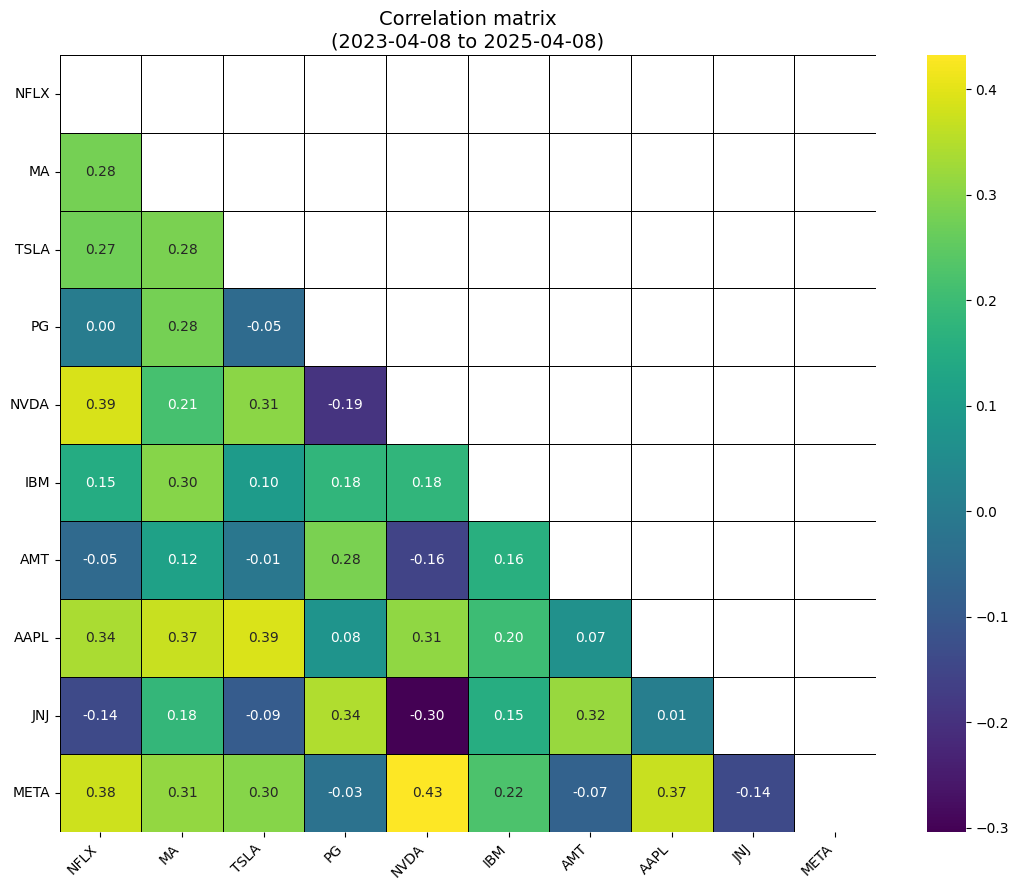

In [82]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(11, 9))  # Adjust size as needed
sns.heatmap(
    correlation_matrix,  # Use the correlation matrix
    mask=mask,           # Apply the mask
    annot=True,          # Show values in the cells
    cmap='viridis',      # Colormap similar to the example ('viridis', 'plasma', 'cividis' work)
    fmt=".2f",           # Format annotations in scientific notation (good for covariance)
                         # Alternative: use ".4f" for fixed decimals if values aren't too small/large
    linewidths=.5,       # Add lines between cells
    linecolor='black',   # Color of the lines
    cbar=True            # Show the color bar
)
plt.title(f'Correlation matrix\n({start_date} to {end_date})', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### including parameters

PARAMETERS SELECTED :
P/E RATIO :
P/B RATIO :
EPS VALUE :

In [83]:
for ticker in companies:
    stock = yf.Ticker(ticker)
    try:
        info = stock.info
        pb_value = info.get('priceToBook')  # P/B Ratio
        pe_value = info.get('trailingPE')  # P/E Ratio
        eps_value = info.get('trailingEps')  # EPS Value

        current_pf.loc[current_pf['Ticker'] == ticker, 'P/B'] = pb_value
        current_pf.loc[current_pf['Ticker'] == ticker, 'P/E'] = pe_value
        current_pf.loc[current_pf['Ticker'] == ticker, 'EPS'] = eps_value
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

current_pf

,Ticker,P/B,P/E,EPS
1,NFLX,15.002680,43.675390,19.87
2,MA,68.431290,34.954643,13.89
3,TSLA,10.289784,114.921180,2.03
4,PG,7.457761,25.514330,6.28
5,NVDA,30.126505,33.210884,2.94
6,IBM,7.658752,35.223090,6.41
7,AMT,29.490050,30.881332,6.91
8,AAPL,40.887787,28.803175,6.30
9,JNJ,5.071039,26.058823,5.78
10,META,7.162678,21.645702,23.85


In [84]:
w1 = 0.5  # weight for P/B ratio1
w2 = 0.3  # weight for P/E ratio
w3 = 0.2  # weight for EPS value

for i in current_pf.index:  # Use the DataFrame's index (1 to 10)
    weights[i - 1] = w1 * (1/current_pf['P/B'][i])+ w2 * (1/current_pf['P/E'][i]) + w3 * current_pf['EPS'][i]

# normalizing weights to one
weights = weights / sum(weights)
current_pf['weights'] = weights

current_pf

,Ticker,P/B,P/E,EPS,weights
1,NFLX,15.002680,43.675390,19.87,0.207124
2,MA,68.431290,34.954643,13.89,0.144159
3,TSLA,10.289784,114.921180,2.03,0.023591
4,PG,7.457761,25.514330,6.28,0.068873
5,NVDA,30.126505,33.210884,2.94,0.031662
6,IBM,7.658752,35.223090,6.41,0.069957
7,AMT,29.490050,30.881332,6.91,0.072684
8,AAPL,40.887787,28.803175,6.30,0.066182
9,JNJ,5.071039,26.058823,5.78,0.065329
10,META,7.162678,21.645702,23.85,0.250439


In [85]:
current_pf.sort_values(by='weights', ascending=False, inplace=True)
current_pf.reset_index(drop=True, inplace=True)
current_pf.index = range(1, len(current_pf) + 1)
current_pf

,Ticker,P/B,P/E,EPS,weights
1,META,7.162678,21.645702,23.85,0.250439
2,NFLX,15.002680,43.675390,19.87,0.207124
3,MA,68.431290,34.954643,13.89,0.144159
4,AMT,29.490050,30.881332,6.91,0.072684
5,IBM,7.658752,35.223090,6.41,0.069957
6,PG,7.457761,25.514330,6.28,0.068873
7,AAPL,40.887787,28.803175,6.30,0.066182
8,JNJ,5.071039,26.058823,5.78,0.065329
9,NVDA,30.126505,33.210884,2.94,0.031662
10,TSLA,10.289784,114.921180,2.03,0.023591


In [86]:
price = yf.download(current_pf['Ticker'].to_list(), period='5d', progress=False)

last_close_prices = price['Close'].iloc[-1]

current_pf['Last_Close_Price'] = current_pf['Ticker'].map(last_close_prices)


In [87]:
current_pf

,Ticker,P/B,P/E,EPS,weights,Last_Close_Price
1,META,7.162678,21.645702,23.85,0.250439,516.250000
2,NFLX,15.002680,43.675390,19.87,0.207124,867.830017
3,MA,68.431290,34.954643,13.89,0.144159,485.519989
4,AMT,29.490050,30.881332,6.91,0.072684,213.389999
5,IBM,7.658752,35.223090,6.41,0.069957,225.779999
6,PG,7.457761,25.514330,6.28,0.068873,160.229996
7,AAPL,40.887787,28.803175,6.30,0.066182,181.460007
8,JNJ,5.071039,26.058823,5.78,0.065329,150.619995
9,NVDA,30.126505,33.210884,2.94,0.031662,97.639999
10,TSLA,10.289784,114.921180,2.03,0.023591,233.289993


In [88]:
shares = np.zeros(10)
for i in current_pf.index:
    shares[i - 1] = capital * current_pf['weights'][i] / current_pf['Last_Close_Price'][i]

current_pf['shares'] = shares

In [89]:
current_pf

,Ticker,P/B,P/E,EPS,weights,Last_Close_Price,shares
1,META,7.162678,21.645702,23.85,0.250439,516.250000,4.851123
2,NFLX,15.002680,43.675390,19.87,0.207124,867.830017,2.386692
3,MA,68.431290,34.954643,13.89,0.144159,485.519989,2.969166
4,AMT,29.490050,30.881332,6.91,0.072684,213.389999,3.406180
5,IBM,7.658752,35.223090,6.41,0.069957,225.779999,3.098441
6,PG,7.457761,25.514330,6.28,0.068873,160.229996,4.298388
7,AAPL,40.887787,28.803175,6.30,0.066182,181.460007,3.647185
8,JNJ,5.071039,26.058823,5.78,0.065329,150.619995,4.337324
9,NVDA,30.126505,33.210884,2.94,0.031662,97.639999,3.242733
10,TSLA,10.289784,114.921180,2.03,0.023591,233.289993,1.011218


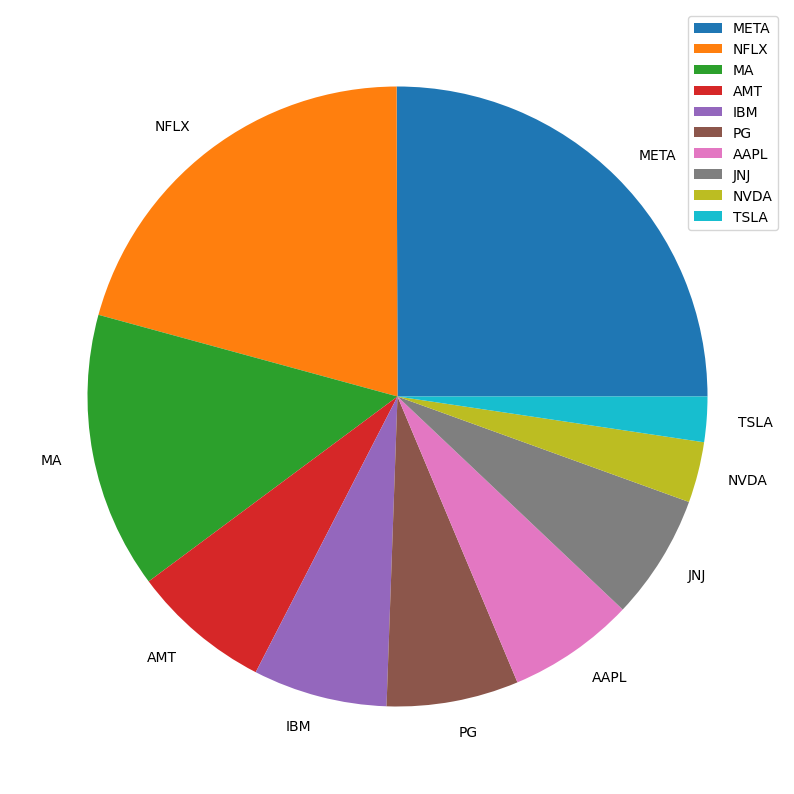

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
plt.pie(current_pf['weights']/sum(current_pf['shares']) ,labels = current_pf['Ticker'])

plt.legend()
plt.show()

## returns calculation

In [ ]:
# Example for getting returns data from Yahoo Finance
import yfinance as yf

data = yf.download(companies, start=start_date, end=end_date)['Close']
returns_df = data.pct_change().dropna()

[*********************100%***********************]  10 of 10 completed


In [ ]:
returns_df.head()

Ticker,AAPL,AMT,IBM,JNJ,MA,META,NFLX,NVDA,PG,TSLA
Date,,,,,,,,,,
2023-04-10,-0.015972,0.008031,0.004061,-0.005026,-0.003679,-0.006247,-0.001002,0.020047,-0.008277,-0.002972
2023-04-11,-0.007591,0.009743,-0.004655,-0.000304,0.011079,-0.004191,-0.002301,-0.014866,-0.001987,0.012357
2023-04-12,-0.004353,0.004183,-0.014415,-0.002131,-0.006454,0.000701,-0.021229,-0.024808,0.002721,-0.033460
2023-04-13,0.034104,0.005293,-0.004979,0.013360,0.021754,0.029673,0.045796,-0.001208,0.004634,0.029689
2023-04-14,-0.002114,-0.018595,0.001876,-0.001625,0.007521,0.005174,-0.021838,0.011148,-0.005073,-0.004841


# performance calculation

In [ ]:
from scipy.optimize import minimize

In [ ]:
# sharpe ratio calculation

In [ ]:
import numpy as np

def calculate_sharpe(returns, risk_free_rate=0.02):
    excess_returns = returns - (risk_free_rate/252)
    return np.sqrt(252) * excess_returns.mean() / excess_returns.std()

In [ ]:
# drawdown value

In [ ]:
def calculate_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding().max()
    return (cumulative - peak).min()

In [ ]:
#calculating annual and total returns

In [ ]:
def calculate_returns(returns):
    cumulative = (1 + returns).prod() - 1
    annualized = (1 + cumulative)**(252/len(returns)) - 1
    return cumulative, annualized

In [ ]:
#calculating current portfolio scores

portfolio_returns = returns_df.dot(weights)  # weighted sum of asset returns

sharpe = calculate_sharpe(portfolio_returns)
drawdown = calculate_drawdown(portfolio_returns)
cumulative_ret, annualized_ret = calculate_returns(portfolio_returns)

print(f"Sharpe: {sharpe}")
print(f"Max Drawdown: {drawdown*100}")
print(f"Cumulative Return: {cumulative_ret*100}")
print(f"Annualized Return: {annualized_ret*100}")

Sharpe: 2.1763959879341526
Max Drawdown: -12.214232210762876
Cumulative Return: 68.90651081308916
Annualized Return: 29.964037646223176


### effecint frontier and optimizing sharpe ratio

In [ ]:
# 252 trading days in a year so dividing equally the risk free rate to get daily rate
risk_free_rate = 0.02/252

In [ ]:
num_portfolios = 10000  # Number of random portfolios to generate
results = np.zeros((3, num_portfolios))  # To store results [return, volatility, sharpe]

In [ ]:
for i in range(num_portfolios):
    # Create random weights that sum to 1
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)

    # Calculate portfolio statistics
    port_return = np.sum(returns_df.mean() * weights) * 252  # Annualized return
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * 252, weights)))  # Annualized vol
    sharpe = (port_return - 0.03) / port_volatility  # Annualized Sharpe ratio

    # Store results
    results[0,i] = port_return
    results[1,i] = port_volatility
    results[2,i] = sharpe

In [ ]:
max_sharpe_idx = np.argmax(results[2])
optimal_weights = np.random.random(len(companies))
optimal_return = results[0, max_sharpe_idx]
optimal_volatility = results[1, max_sharpe_idx]

for optimization we need to use the negative sharpe and then we are minimizing it , because the scipy doesnt have as such maximum function as per our requirement

In [ ]:
def negative_sharpe(weights):
    port_return = np.sum(returns_df.mean() * weights) * 252
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * 252, weights)))
    return -(port_return - 0.03) / port_volatility

In [ ]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(len(companies)))  # No short selling
initial_guess = np.ones(len(companies)) / len(companies)  # Equal weights

optimal_result = minimize(negative_sharpe, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = optimal_result.x

In [ ]:
for ticker, weight in zip(companies, optimal_weights):
    current_pf.loc[current_pf['Ticker'] == ticker, 'Optimal_Weights(%)'] = weight*100

current_pf

,Ticker,P/B,P/E,EPS,weights,Last_Close_Price,shares,optiminal_Weights,Optimal_Weights,Optimal_Weights(%)
1,MA,69.030304,35.209920,13.91,0.191134,489.769989,3.902533,0.027310,9.153259,9.153259
2,TSLA,10.560602,117.367645,2.04,0.163333,239.429993,6.821733,0.091533,17.552700,17.552700
3,AAPL,42.447050,29.949127,6.29,0.125664,188.380005,6.670759,0.175527,6.108558,6.108558
4,AMT,30.427030,31.862518,6.91,0.104450,220.169998,4.744051,0.146741,13.479138,13.479138
5,NVDA,29.099043,32.078228,2.94,0.098886,94.309998,10.485162,0.089378,8.937760,8.937760
6,NFLX,14.795747,43.094660,19.86,0.097038,855.859985,1.133803,0.158540,2.730999,2.730999
7,IBM,7.716418,35.488300,6.41,0.063046,227.479996,2.771488,0.134791,15.853982,15.853982
8,META,7.002845,21.144950,23.87,0.058382,504.730011,1.156700,0.061086,2.102045,2.102045
9,PG,7.621596,26.033386,6.29,0.051433,163.750000,3.140939,0.094074,14.674143,14.674143
10,JNJ,5.159249,26.466322,5.79,0.046635,153.240005,3.043290,0.021020,9.407416,9.407416


In [ ]:
print(current_pf[['Ticker', 'Optimal_Weights(%)']])

   Ticker  Optimal_Weights(%)
1      MA            9.153259
2    TSLA           17.552700
3    AAPL            6.108558
4     AMT           13.479138
5    NVDA            8.937760
6    NFLX            2.730999
7     IBM           15.853982
8    META            2.102045
9      PG           14.674143
10    JNJ            9.407416


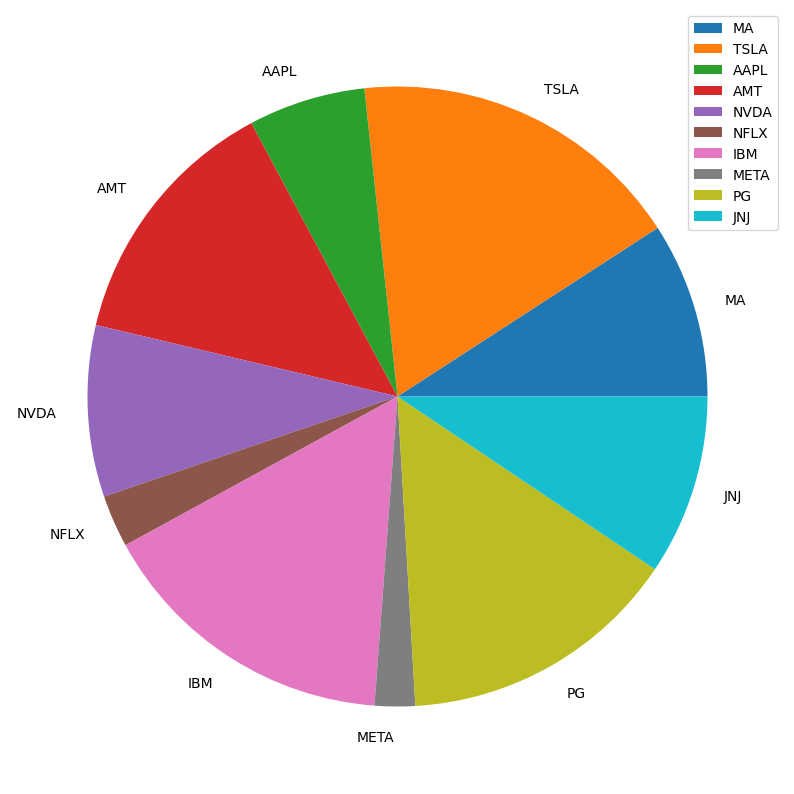

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
plt.pie(current_pf['Optimal_Weights(%)'],labels = current_pf['Ticker'])

plt.legend()
plt.show()

In [ ]:
print(f"\nExpected Annual Return: {optimal_return*100}")
print(f"Expected Volatility: {optimal_volatility*100}")
print(f"Sharpe Ratio: {results[2, max_sharpe_idx]}")


Expected Annual Return: 36.93226064633875
Expected Volatility: 11.181757924152583
Sharpe Ratio: 3.0346087687200876


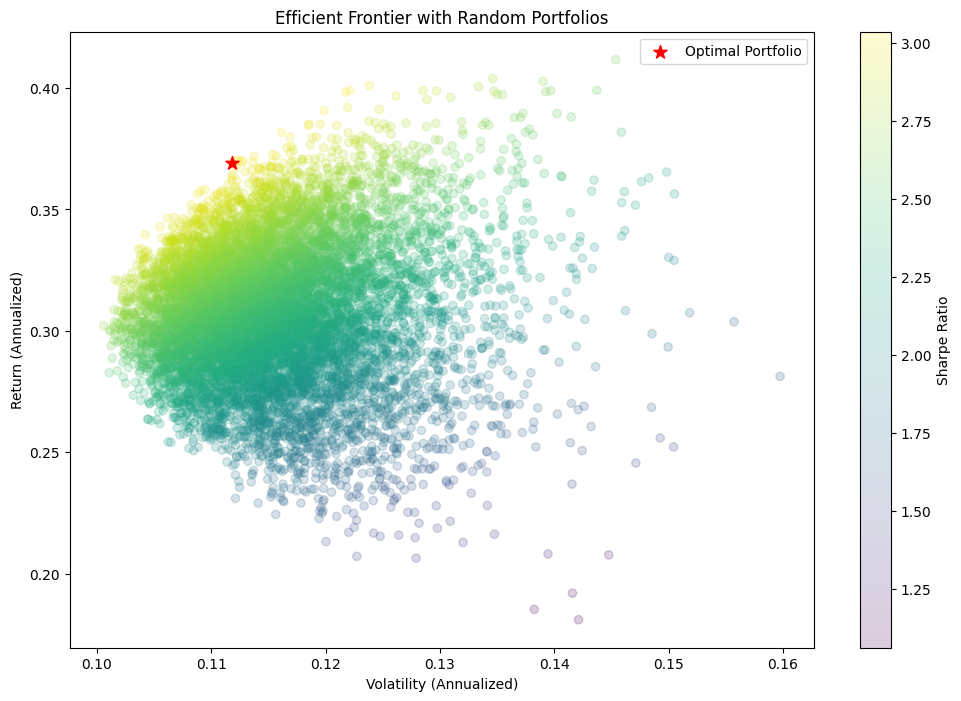

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o',alpha =0.2)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_volatility, optimal_return, c='red', s=100, marker='*', label='Optimal Portfolio')
plt.xlabel('Volatility (Annualized)')
plt.ylabel('Return (Annualized)')
plt.title('Efficient Frontier with Random Portfolios')
plt.legend()
plt.show()

# backtesting and optimization

In [ ]:
tickers = companies
rebalance_freq = 'Q'  # Quarterly rebalancing
transaction_cost = 0.000

In [ ]:
rebalance_dates = pd.date_range(start=start_date, end=end_date, freq=rebalance_freq)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Configuration
tickers = companies
initial_capital = 10000
risk_free_rate = 0.02
rebalance_freq = 'Q'  # Quarterly

In [ ]:
def get_fundamental_data(ticker, date):
    try:
      stock = yf.Ticker(ticker)
      info = stock.info

      pb_value = info.get('priceToBook')
      pe_value = info.get('trailingPE')
      eps_value = info.get('trailingEps')

    except Exception as e:
      print(f"Error fetching data for {ticker} on {date}: {e}")

    return {
        'pe': pe_value,
        'pb': pb_value,
        'eps': eps_value}

In [ ]:
def calculate_scores(tickers, date, param_weights):
    scores = []
    for ticker in tickers:
        fundamentals = get_fundamental_data(ticker, date)

        # Normalize factors (higher = better)
        pe_score = 1 / fundamentals['pe']  # Inverse P/E
        pb_score = 1 / fundamentals['pb']  # Inverse P/B
        eps_score = fundamentals['eps']    # Higher EPS better

        # Combine with parameter weights
        score = (w1*pe_score + w2*pb_score + w3* eps_score)
        scores.append(score)

    return pd.Series(scores, index=tickers)

In [ ]:
def scores_to_weights(scores):
    weights = scores / scores.sum()
    weights[weights < 0.01] = 0  # Remove negligible weights
    return weights / weights.sum()  # Renormalize

In [ ]:
def run_backtest(price_data):

    # Generate quarterly rebalance dates
    rebalance_dates = pd.date_range(
        start=price_data.index[0],
        end=price_data.index[-1],
        freq=rebalance_freq
    )

    # Track portfolio
    portfolio_value = [initial_capital]
    weights_history = pd.DataFrame(index=rebalance_dates, columns=tickers)

    # Parameter weights (manually set or optimize these)
    param_weights = [w1, w2, w3]  # Weights for [P/E, P/B, EPS]

    for i in range(len(rebalance_dates)-1):
        rebalance_date = rebalance_dates[i]
        next_date = rebalance_dates[i+1]

        # Get fundamental data AS OF rebalance date
        scores = calculate_scores(tickers, rebalance_date, param_weights)
        current_weights = scores_to_weights(scores)
        weights_history.loc[rebalance_date] = current_weights

        # Get returns for this quarter
        quarter_prices = price_data.loc[rebalance_date:next_date]
        quarter_returns = quarter_prices.pct_change().dropna()

        # Calculate portfolio performance
        if not quarter_returns.empty:
            portfolio_returns = (quarter_returns * current_weights).sum(axis=1)
            cumulative_return = (1 + portfolio_returns).prod() - 1
            portfolio_value.append(portfolio_value[-1] * (1 + cumulative_return))

    return portfolio_value, weights_history

In [ ]:
price_data = yf.download(tickers, period="2y")["Close"]

portfolio_value, weights_history = run_backtest(price_data)

portfolio_values = pd.Series(portfolio_value,index=pd.date_range(start=price_data.index[0],periods=len(portfolio_value)))

[*********************100%***********************]  10 of 10 completed


In [ ]:
weights_history

,NFLX,MA,TSLA,PG,NVDA,IBM,AMT,AAPL,JNJ,META
2023-06-30,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2023-09-30,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2023-12-31,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2024-03-31,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2024-06-30,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2024-09-30,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2024-12-31,0.207878,0.145145,0.02281,0.06829,0.031815,0.069304,0.073093,0.066674,0.064061,0.25093
2025-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
portfolio_values

,0
2023-04-10,10000.000000
2023-04-11,9648.362774
2023-04-12,11213.948887
2023-04-13,13497.299112
2023-04-14,14095.622004
2023-04-15,15866.282181
2023-04-16,16898.914358
2023-04-17,17389.756346


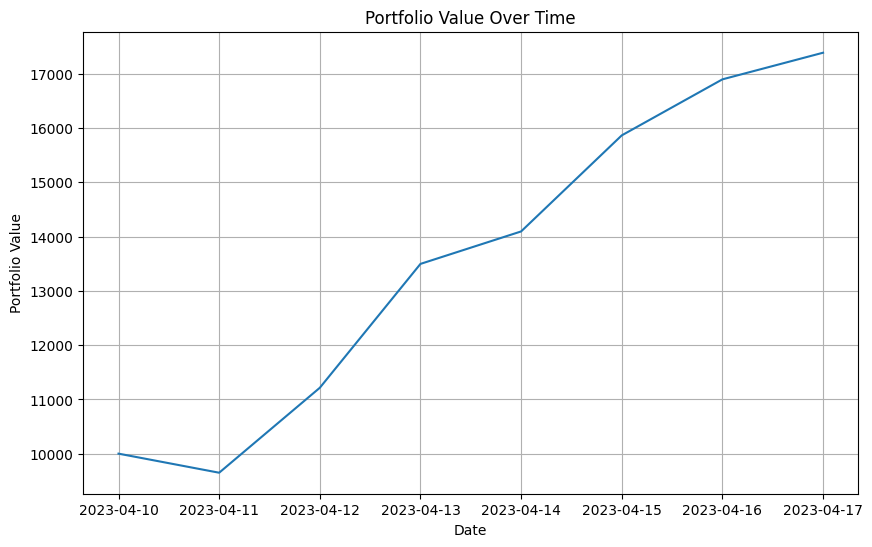

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_values.index, portfolio_values.values)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.grid(True)
plt.show()


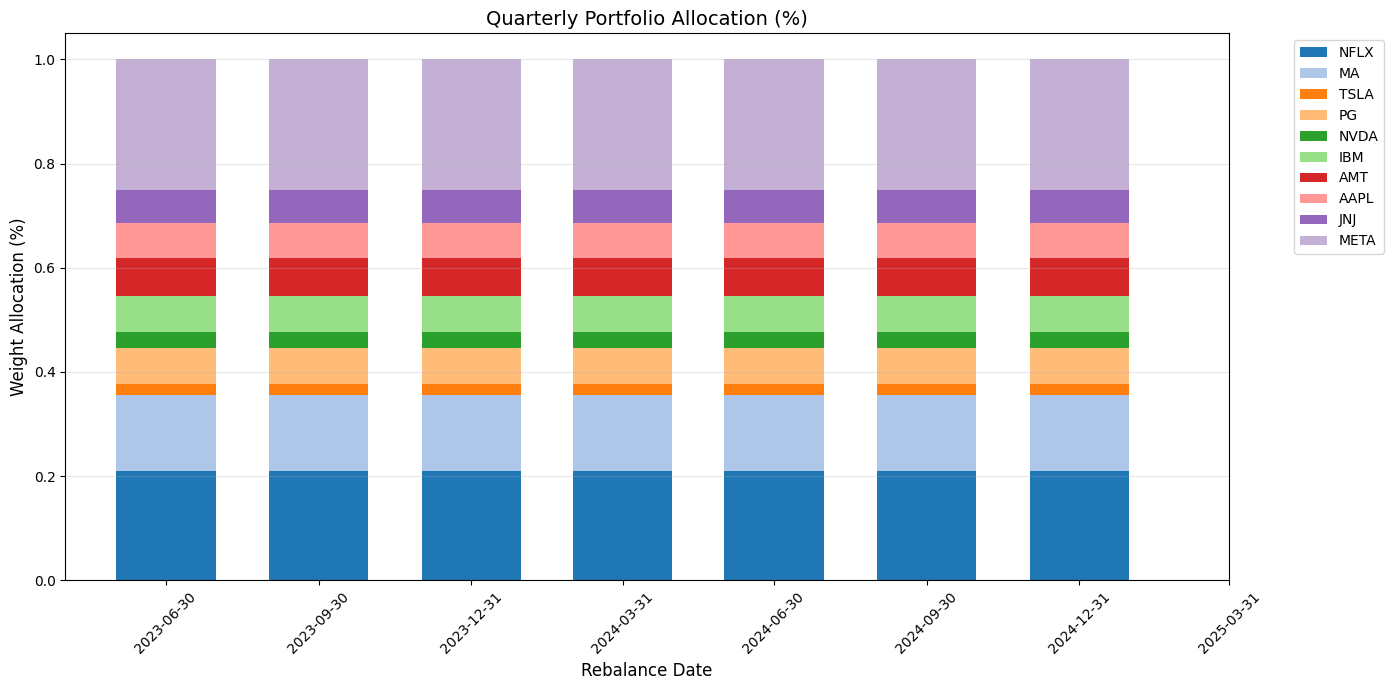

In [ ]:
weights_df = weights_history

# Plot
plt.figure(figsize=(14, 7))
colors = plt.cm.tab20.colors  # Color palette

# Stacked bars
bottom = None
for i, col in enumerate(weights_df.columns):
    plt.bar(weights_df.index, weights_df[col], bottom=bottom,
            label=col, color=colors[i], width=60)  # width=60 makes bars wider for quarterly data
    if bottom is None:
        bottom = weights_df[col].values
    else:
        bottom += weights_df[col].values

# Formatting
plt.title('Quarterly Portfolio Allocation (%)', fontsize=14)
plt.xlabel('Rebalance Date', fontsize=12)
plt.ylabel('Weight Allocation (%)', fontsize=12)
plt.xticks(weights_df.index, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

plt.show()